# DATA EXPLORATION

# **Setup**

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [2]:
# Import cleaned Coffee Data
df = pd.read_csv('Dataset/CleanedCoffeeData.csv');
df.head(1)

,ID,Name,Type,Serving,Serving Size,Headline,Intensity,Sleeve Price,Per Capsule Price,Caption,...,Roast Type,Intensity Classification,Acidity Classification,Bitterness Classification,Roastness Classification,Body Classification,Milky Taste Classification,Bitterness with Milk Classification,Roastiness with Milk Classification,Creamy Texture Classification
0,VL01,Intenso,Vertuo,Coffee,230ml,Smooth & Strong,9.0,12.6,1.26,Why we love it: Try Intenso - a Vertuo coffee ...,...,Dark,High,Low,High,High,Medium,Medium,Medium,Medium,Medium


# **Take a Peek of the Data**

In [3]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       70 non-null     object 
 1   Name                                     70 non-null     object 
 2   Type                                     70 non-null     object 
 3   Serving                                  70 non-null     object 
 4   Serving Size                             70 non-null     object 
 5   Headline                                 70 non-null     object 
 6   Intensity                                70 non-null     float64
 7   Sleeve Price                             70 non-null     float64
 8   Per Capsule Price                        70 non-null     float64
 9   Caption                                  70 non-null     object 
 10  Taste                                    70 non-null

In [4]:
# Summary Statistics
df.describe()

,Intensity,Sleeve Price,Per Capsule Price,Acidity,Bitterness,Roastness,Body,Milky Taste,Bitterness with Milk,Roastiness with Milk,Creamy Texture,Number of Capsules per Sleeve
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000
mean,6.985714,10.338571,1.047571,2.028571,2.828571,3.071429,2.828571,2.785714,2.785714,2.871429,2.90000,9.914286
std,2.268198,1.486392,0.176006,1.102979,1.089760,1.053929,1.006809,0.699749,0.740013,0.536263,0.42221,0.503405
min,2.000000,8.700000,0.870000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,7.000000
25%,6.000000,9.200000,0.920000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.00000,10.000000
50%,6.000000,9.800000,0.980000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,10.000000
75%,8.000000,11.150000,1.182500,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.00000,10.000000
max,13.000000,13.700000,1.600000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.00000,10.000000


In [5]:
# Numerical columns
df.select_dtypes(np.number).columns

Index(['Intensity', 'Sleeve Price', 'Per Capsule Price', 'Acidity',
       'Bitterness', 'Roastness', 'Body', 'Milky Taste',
       'Bitterness with Milk', 'Roastiness with Milk', 'Creamy Texture',
       'Number of Capsules per Sleeve'],
      dtype='object')

In [6]:
# Non-Numerical columns
df.select_dtypes('object').columns

Index(['ID', 'Name', 'Type', 'Serving', 'Serving Size', 'Headline', 'Caption',
       'Taste', 'Best Served As', 'Notes', 'Ingredients & Allergens',
       'Net Weight per Total Number of Capsules', 'Capsule Image Link',
       'Capsule & Sleeve Image Link', 'Decaf Coffee?', 'Category',
       'Other Information', 'Status', 'Roast Type', 'Intensity Classification',
       'Acidity Classification', 'Bitterness Classification',
       'Roastness Classification', 'Body Classification',
       'Milky Taste Classification', 'Bitterness with Milk Classification',
       'Roastiness with Milk Classification', 'Creamy Texture Classification'],
      dtype='object')

# **Exploratory Data Analysis**

## Univariate Analysis

Type
Original    35
Vertuo      35
Name: ID, dtype: int64


([<matplotlib.patches.Wedge at 0x7f8a3e98c1f0>,
 [Text(6.735557395310444e-17, 1.1, 'Original'),
  Text(-2.0206672185931328e-16, -1.1, 'Vertuo')],
 [Text(3.6739403974420595e-17, 0.6, '50%'),
  Text(-1.1021821192326178e-16, -0.6, '50%')])

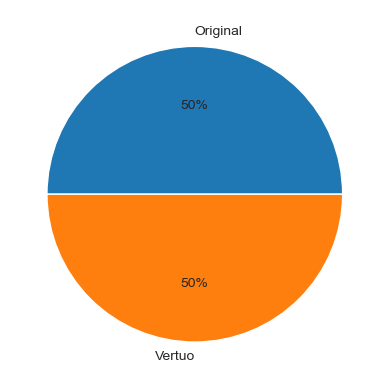

In [7]:
# Pie Chart showing the number of coffees per machine type
print(df.groupby(by='Type')['ID'].count());
def chart_numCoffeesPerMachineType(dataframe):
    chart = plt.pie(dataframe, labels = dataframe.index, autopct='%.0f%%');
    return chart;

chart_numCoffeesPerMachineType(dataframe=df.groupby(by='Type')['ID'].count())

The Pie Chart above shows the proportion of the two lines of coffee machine. In turn, the proportion of coffee capsules by machine line that is part of our standard menu. There are 75 coffee flavors across the two machine lines, and equal split by machine. 

Serving
Carafe              2
Coffee             14
Double Espresso     4
Espresso           32
Gran Lungo          6
Lungo              12
Name: ID, dtype: int64


<AxesSubplot:title={'center':'Distribution of Serving Sizes'}, xlabel='Serving', ylabel='Count'>

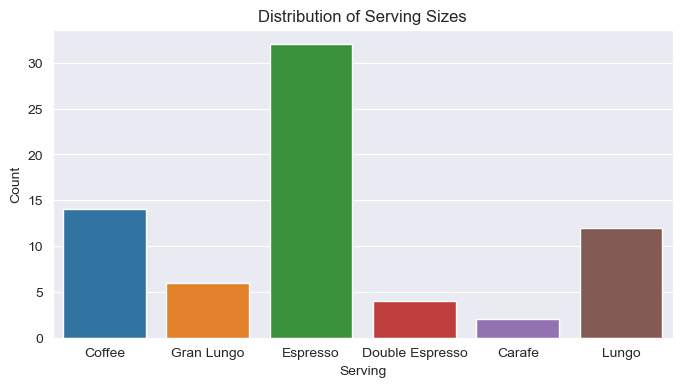

In [8]:
# Bar chart assessing the distribution of serving sizes
print(df.groupby(by=['Serving'])['ID'].count());
def chart_numCoffeesPerColumn(dataframe, column, title):
    fig, ax = plt.subplots(figsize=(8,4));
    ax = sns.countplot(data=dataframe, x=column);
    ax.set(ylabel='Count', title=title);
    return ax;

chart_numCoffeesPerColumn(
    dataframe=df,
    column='Serving',
    title='Distribution of Serving Sizes'
)

The categorical bar chart shows the distribution of serving sizes across both lines of machine. The Espresso size is shared between both the Vertuo and Original machine lines, thus it makes sense why there is a vast number of coffee flavours. Nespresso's first line of machines were the Original line, and the machines for that type of machine exclusively made Espresso (40ml) and Lungo (110ml) serving sizes. The newer Vertuo line of coffee consists of maximum five serving sizes &dash; Espresso (40ml), Double Espresso (80ml), Gran Lungo (110ml), Coffee (230ml), Carafe (535ml). The Vertuo line has some espresso's but has a lot more flavours of coffee serving size.

Serving          Type    
Carafe           Vertuo       2
Coffee           Vertuo      14
Double Espresso  Vertuo       4
Espresso         Original    23
                 Vertuo       9
Gran Lungo       Vertuo       6
Lungo            Original    12
Name: ID, dtype: int64


<AxesSubplot:title={'center':'Distribution of Serving by Machine Type'}, xlabel='Count', ylabel='Serving'>

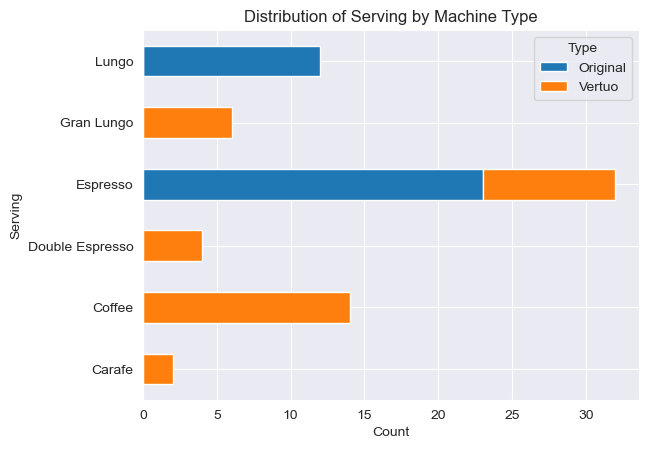

In [9]:
# Side by Side horizontal bar chart showing serving size distribution by machine type
print(df.groupby(by=['Serving','Type'])['ID'].count())
def chart_numCoffeesPerMachineTypeAndColumn(dataframe, column1, column2, type):
    if type == 'stacked':
        chart = df.groupby(by=[column1,column2]).size().unstack().plot(kind='barh', stacked=True);
    else:
        chart = df.groupby(by=[column1])[column2].value_counts().unstack().plot(kind='barh');
    chart.set_title(f'Distribution of {column1} by Machine {column2}');
    chart.set_xlabel('Count');
    return chart;

chart_numCoffeesPerMachineTypeAndColumn(dataframe=df, column1='Serving', column2='Type', type='stacked')

The stacked bar chart above shows the distribution of serving sizes by machine type. For performing optimal comparison, the chart above indicates that despite there being a greater number of coffee flavours of espresso serving size, a large portion of those espressos are a part of the Original line menu and a smaller portion of those espressos are a part of the Vertuo line menu. Furthermore, the above chart visually indicates that all other serving sizes (other than Espresso) are unique to a specific machine line. The Lungo serving size is unique to original line machines. The Double Espresso, Gran Lungo, Coffee, and Carafe serving sizes are unique to the Vertuo line machines.

<AxesSubplot:title={'center':'Distribution of Serving by Machine Type'}, xlabel='Count', ylabel='Serving'>

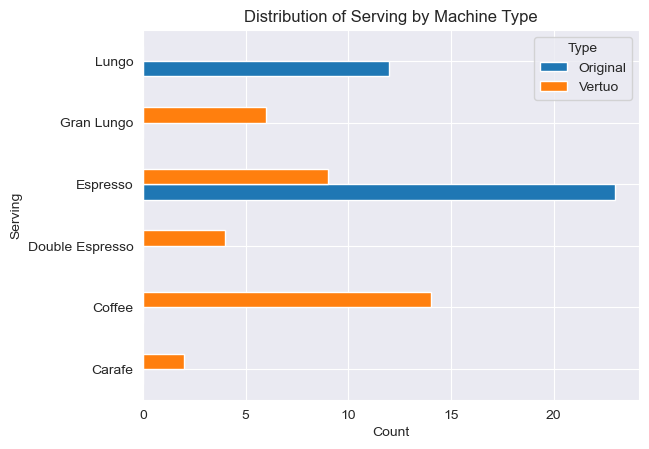

In [10]:
# Stacked horizontal bar chart showing serving size distribution by machine type
chart_numCoffeesPerMachineTypeAndColumn(dataframe=df, column1='Serving', column2='Type', type=None)

The chart above is an alternate version of the chart prior, but in the more traditional side-by-side bar chart format. This chart is good as it better distinguishes the difference in the number of Espressos between the Vertuo and Original line. It can be seen that less than half of the Espressos are part of the Vertuo line menu.

Sleeve Price  Type    
8.7           Original    15
9.2           Original     8
9.7           Original    12
9.9           Vertuo       8
10.8          Vertuo       1
11.0          Vertuo       8
11.2          Vertuo       2
12.1          Vertuo       2
12.6          Vertuo      12
13.7          Vertuo       2
Name: ID, dtype: int64


(<AxesSubplot:title={'center':'Overall'}, xlabel='Sleeve Price ($)'>,
 <AxesSubplot:title={'center':'Original'}, xlabel='Sleeve Price ($)'>,
 <AxesSubplot:title={'center':'Vertuo'}, xlabel='Sleeve Price ($)'>)

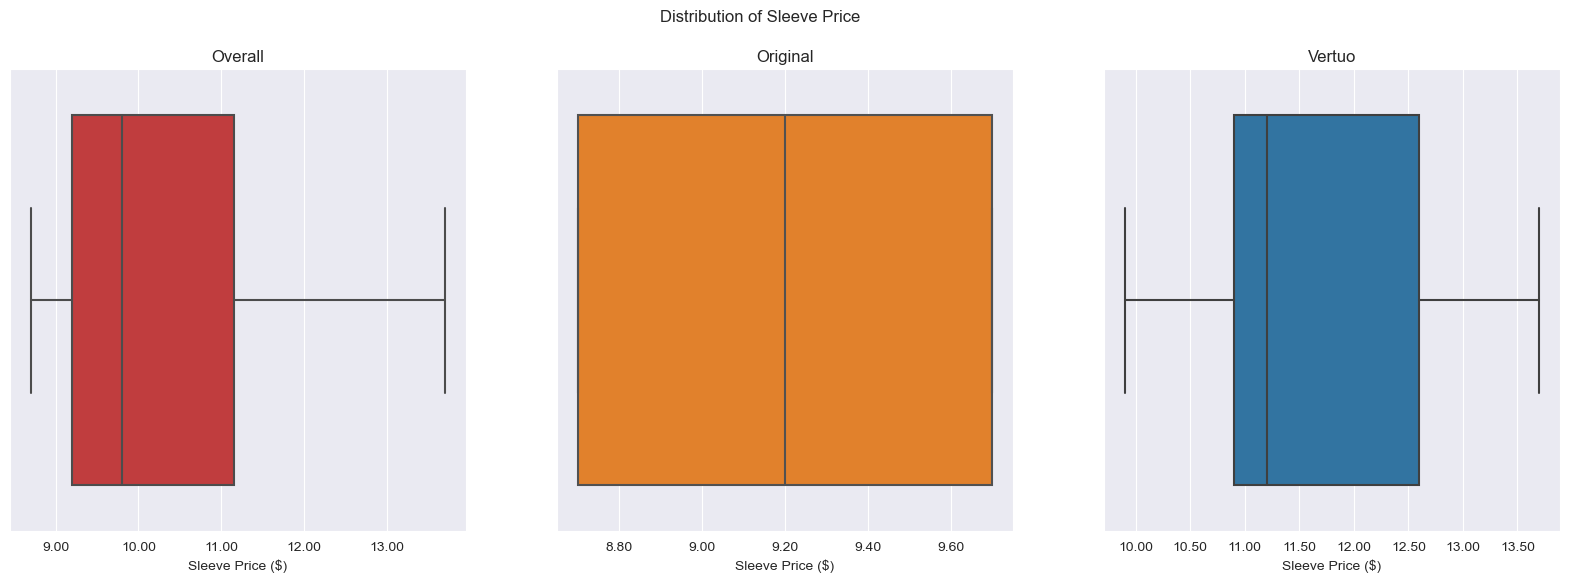

In [11]:
# Boxplots showing the distribution of sleeve price overall as well as per machine type
print(df.groupby(by=['Sleeve Price','Type'])['ID'].count());
def chart_sleevePerCapsuleMachineType(dataframe, column):
    fig = plt.figure(figsize=(20,6));
    ax1 = fig.add_subplot(1,3,1);
    ax2 = fig.add_subplot(1,3,2);
    ax3 = fig.add_subplot(1,3,3);

    fig.suptitle(f'Distribution of {column}');
    
    sns.boxplot(ax=ax1, x=dataframe[column], color=sns.color_palette()[3]);
    ax1.set_title('Overall');
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
    ax1.set_xlabel(f'{column} ($)');
    
    sns.boxplot(ax=ax2, x=dataframe[dataframe['Type'] == 'Original'][column], color=sns.color_palette()[1]);
    ax2.set_title(f'Original')
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
    ax2.set_xlabel(f'{column} ($)');

    sns.boxplot(ax=ax3, x=dataframe[dataframe['Type'] == 'Vertuo'][column], color=sns.color_palette()[0]);
    ax3.set_title(f'Vertuo');
    ax3.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
    ax3.set_xlabel(f'{column} ($)');

    return ax1, ax2, ax3;

chart_sleevePerCapsuleMachineType(dataframe=df, column='Sleeve Price')

The box-and-whisker plots above show the distribution of sleeve prices overall (i.e., the entire lineup of coffee flavours across the machine lines), as well as per machine line. A sleeve is referred to as coffee flavour pack of ten capsules. The minimum unit of purchase is ten capsules per flavour. From the 'Overall' box-and-whisker plot, it can be seen that Inter-Quartile range of the coffee flavours are less than 11.00 CAD. This could be contibuted by the fact that a significant number of coffee flavours are from the original line. This is further confirmed by the 'Original' box-and-whisker plot. The 'Vertuo' box-and-whisker plot indicates that Inter-Quartile range of the coffee flavours are approximately within 11.00 CAD to 12.60 CAD, which infers that most of the Vertuo coffees are of Gran Lungo & Coffee serving sizes. 

Per Capsule Price  Type    
0.87               Original    15
0.92               Original     8
0.97               Original    12
0.99               Vertuo       8
1.08               Vertuo       1
1.10               Vertuo       8
1.21               Vertuo       2
1.26               Vertuo      12
1.37               Vertuo       2
1.60               Vertuo       2
Name: ID, dtype: int64


(<AxesSubplot:title={'center':'Overall'}, xlabel='Per Capsule Price ($)'>,
 <AxesSubplot:title={'center':'Original'}, xlabel='Per Capsule Price ($)'>,
 <AxesSubplot:title={'center':'Vertuo'}, xlabel='Per Capsule Price ($)'>)

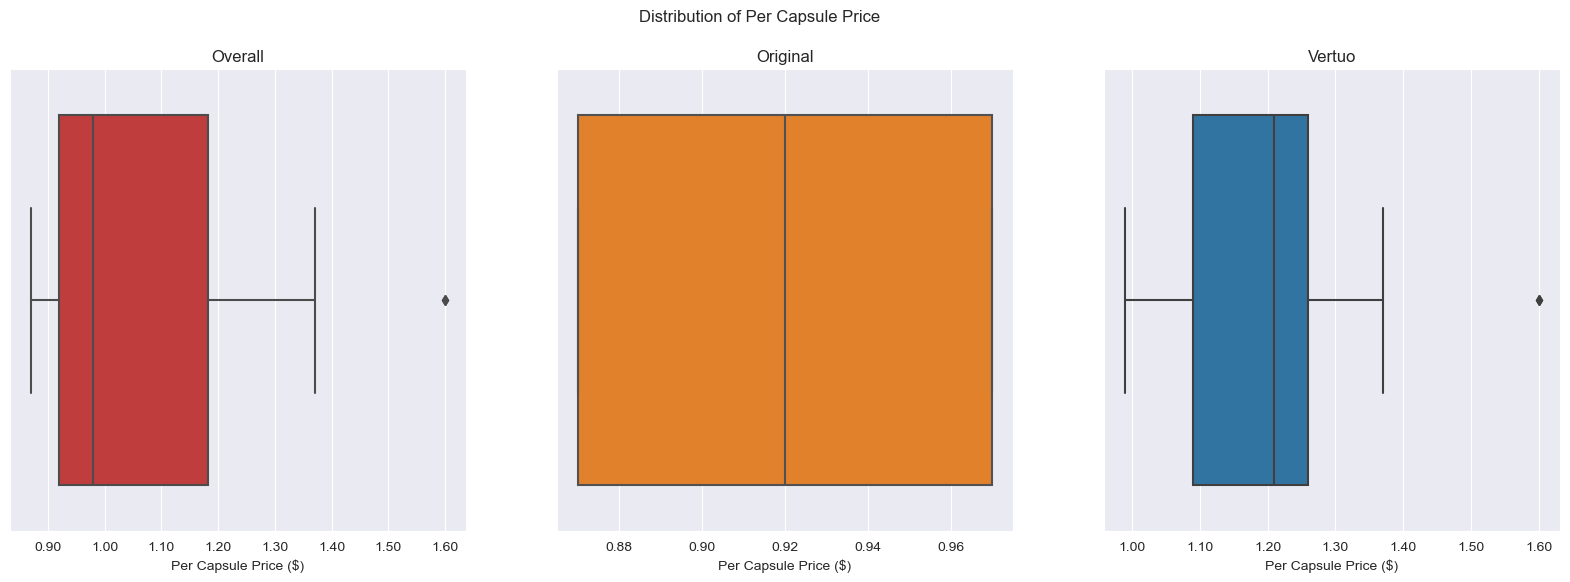

In [12]:
# Boxplots showing the distribution of per capsule price overall as well as per machine type
print(df.groupby(by=['Per Capsule Price','Type'])['ID'].count());
chart_sleevePerCapsuleMachineType(dataframe=df, column='Per Capsule Price')

The box-and-whisker plots above help explain the spread of coffee flavour prices per capsule. Interestingly, the set of box-and-whisker plots of sleeve price did not have any outliers; The set of plots above do. The outlier is indicative of the per-capsule price of the Carafe serving size flavours. This is because the Carafe sleeve prices are $11.20 CAD which contain seven capsules instead of ten.

(<AxesSubplot:xlabel='Sleeve Price ($)', ylabel='count'>,
 <AxesSubplot:xlabel='Per Capsule Price ($)', ylabel='count'>)

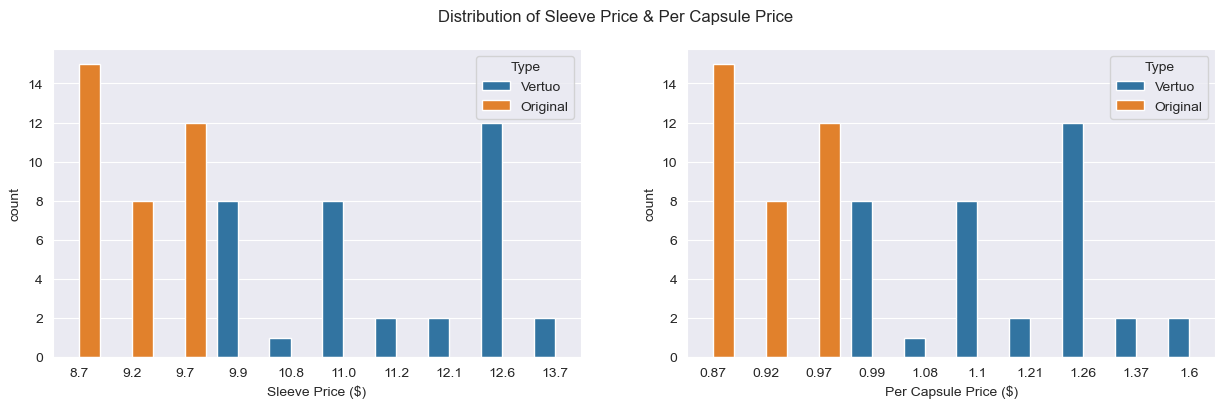

In [13]:
# Count Plot of the number of coffees based on sleeve price & per capsule price overall and by machine type
def chart_numCoffeesSleeveCapsuleMachineType(dataframe, column1, column2):
    fig = plt.figure(figsize=(15,4));
    ax1 = fig.add_subplot(1,2,1);
    ax2 = fig.add_subplot(1,2,2);
    fig.suptitle(f'Distribution of {column1} & {column2}');
    sns.countplot(ax=ax1, data=dataframe, x=column1, hue='Type');
    ax1.set_xlabel(f'{column1} ($)');
    # ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
    sns.countplot(ax=ax2, data=dataframe, x=column2, hue='Type');
    ax2.set_xlabel(f'{column2} ($)');
    # ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'));
    return ax1, ax2;

chart_numCoffeesSleeveCapsuleMachineType(dataframe=df, column1='Sleeve Price', column2='Per Capsule Price')

The bar charts above show the distribution of sleeve price & per capsule price of the coffee flavours with a clear distinction on the machine type. These charts visually indicate that the original line coffee flavours are all under 10.00 CAD (1.00 CAD per capsule). In regards to the Vertuo line, a significant number of coffees are 9.90 CAD (0.99 CAD per capsule), 11.00 CAD (1.10 CAD per capsule), and 12.60 CAD (1.26 CAD per capsule).

<AxesSubplot:title={'center':'Distribution of Intensity'}, xlabel='Intensity', ylabel='Count'>

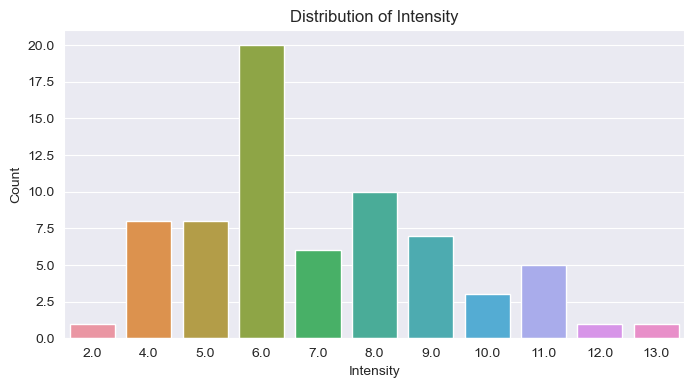

In [14]:
# Bar plot showing distribution of intensity levels
chart_numCoffeesPerColumn(
    dataframe=df,
    column='Intensity',
    title='Distribution of Intensity'
)

The bar chart above shows the distribution of intensity levels of the coffee flavours. The chart is indicative of left-skewed & right-tail distribution. Most of the intensity levels are situated within the 5.0 to 8.0 range which is in the range of medium to almost-dark roast type.

array([[<AxesSubplot:xlabel='Acidity', ylabel='count'>,
        <AxesSubplot:xlabel='Bitterness', ylabel='count'>],
       [<AxesSubplot:xlabel='Body', ylabel='count'>,
        <AxesSubplot:xlabel='Roastness', ylabel='count'>]], dtype=object)

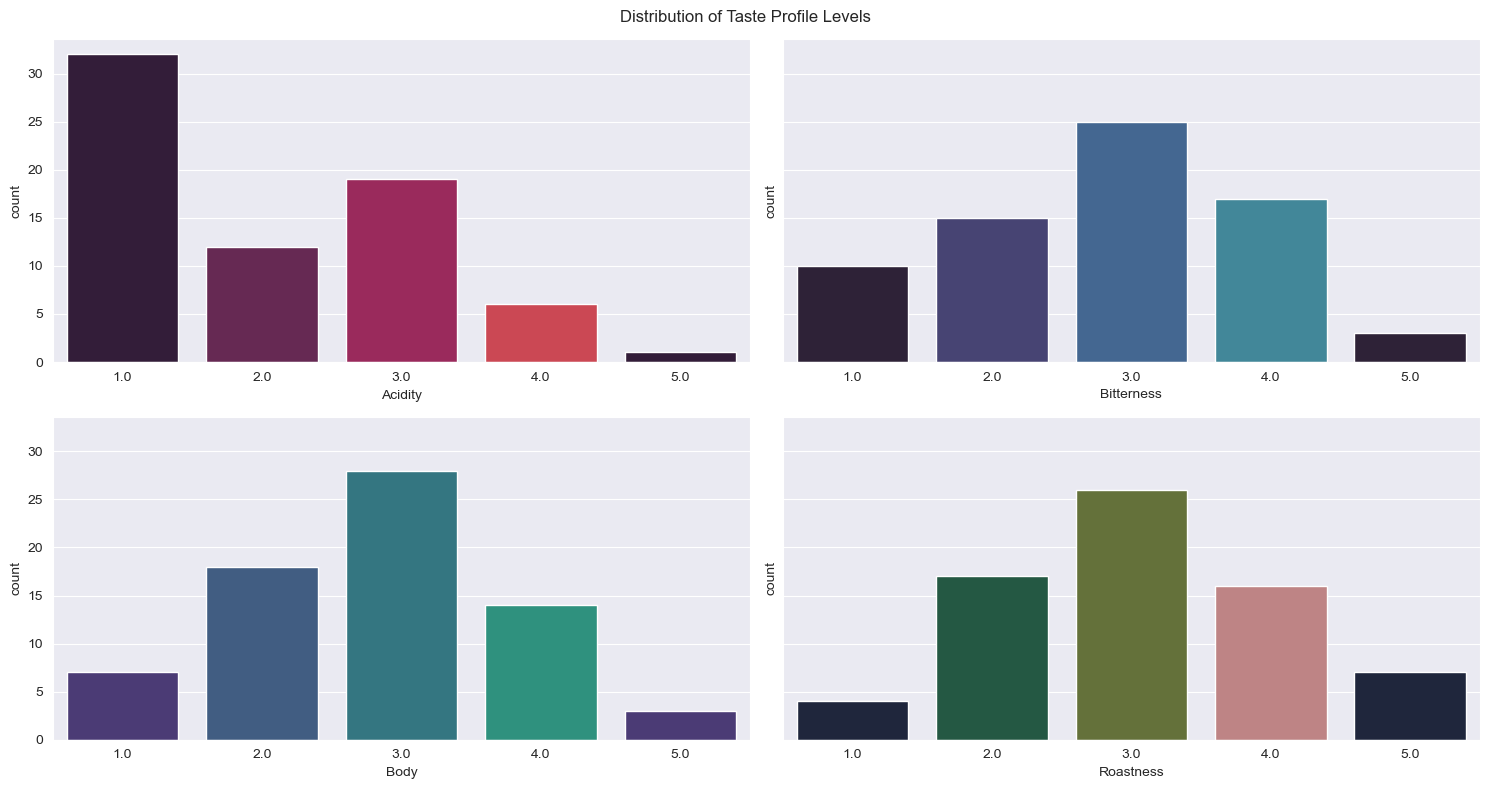

In [15]:
# Bar plot of taste profile level distribution
def charts_tasteProfileLevels(dataframe, columns, title, palettes):
    fig, axes = plt.subplots(2, 2, figsize=(15,8), sharey='all');
    fig.suptitle(title);
    limit = len(dataframe[columns[0]].unique()) - 1;
    sns.countplot(ax=axes[0, 0], data=dataframe, x=columns[0], palette=palettes[0][0:limit]);
    sns.countplot(ax=axes[0, 1], data=dataframe, x=columns[1], palette=palettes[1][0:limit]);
    sns.countplot(ax=axes[1, 0], data=dataframe, x=columns[2], palette=palettes[2][0:limit]);
    sns.countplot(ax=axes[1, 1], data=dataframe, x=columns[3], palette=palettes[3][0:limit]);
    plt.tight_layout();
    return axes;

charts_tasteProfileLevels(
    dataframe=df, 
    columns=['Acidity','Bitterness','Body','Roastness'], 
    title='Distribution of Taste Profile Levels',
    palettes=[
        sns.color_palette('rocket'),
        sns.color_palette("mako"),
        sns.color_palette('viridis'),
        sns.color_palette('cubehelix')
    ]
)

The charts above show the distribution of taste profile level. The distribution of all taste profile levels are gaussian besides Acidity, which is left-skewed & right tail. This makes sense as most of the coffees on the menu that are not flavoured are within the 5.0 to 8.0 intensity levels.

array([[<AxesSubplot:xlabel='Milky Taste', ylabel='count'>,
        <AxesSubplot:xlabel='Bitterness with Milk', ylabel='count'>],
       [<AxesSubplot:xlabel='Roastiness with Milk', ylabel='count'>,
        <AxesSubplot:xlabel='Creamy Texture', ylabel='count'>]],
      dtype=object)

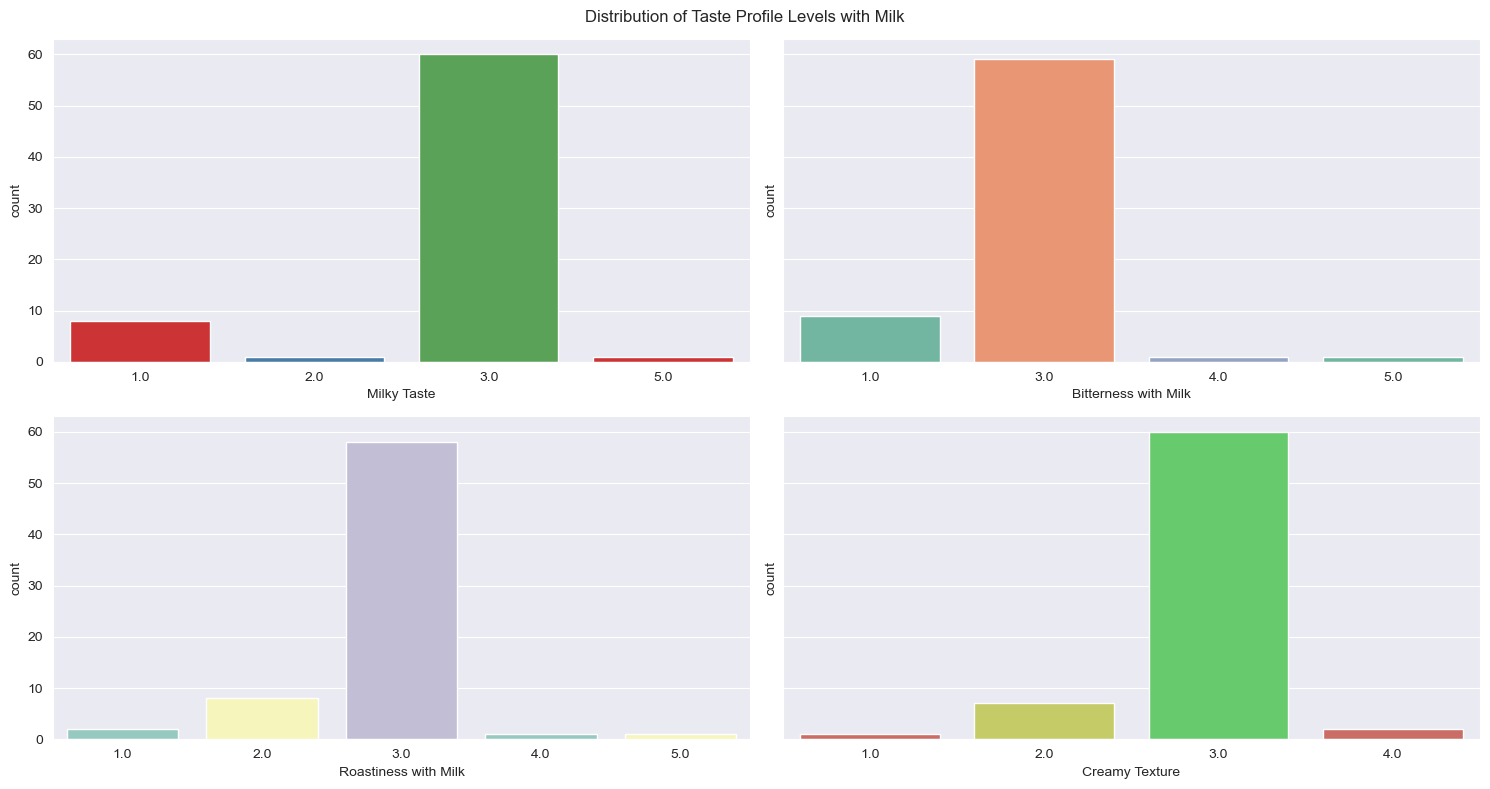

In [16]:
# Bar plot of taste profile level with milk distribution
charts_tasteProfileLevels(
    dataframe=df, 
    columns=['Milky Taste','Bitterness with Milk','Roastiness with Milk','Creamy Texture'], 
    title='Distribution of Taste Profile Levels with Milk',
    palettes=[
        sns.color_palette('Set1'),
        sns.color_palette("Set2"),
        sns.color_palette('Set3'),
        sns.color_palette('hls')
    ]
)

Based on the above charts, there does not seem to decipherable trend of distribution regarding the Taste Profile levels with Milk. This is because there is only a small handful of coffee flavours that are flavoured. These are typically coffees in the Barista Creations category.

<AxesSubplot:title={'center':'Distribution of Roast Type by Machine Type'}, xlabel='Count', ylabel='Roast Type'>

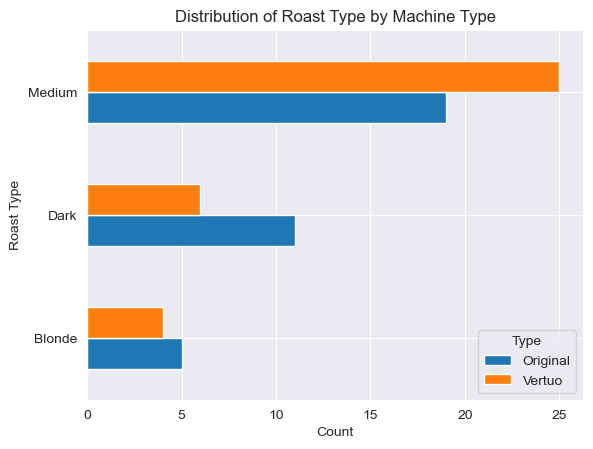

In [17]:
# Side by side horizontal bar chart of number of coffees per roast type and machine type
chart_numCoffeesPerMachineTypeAndColumn(dataframe=df, column1='Roast Type', column2='Type', type=None)

The horizontal side-by-side bar chart above indicates that there are slightly more medium roast coffee flavours for Vertuo line compared to Original line. Although, there are more dark & medium roast coffees for Original line compared to Vertuo line.

([<matplotlib.patches.Wedge at 0x7f8a443033d0>,
 [Text(-1.0603591514624071, 0.29264051310425915, 'No'),
  Text(1.0603591583121525, -0.29264048828476175, 'Yes')],
 [Text(-0.5783777189794947, 0.1596220980568686, '91%'),
  Text(0.5783777227157195, -0.15962208451896095, '9%')])

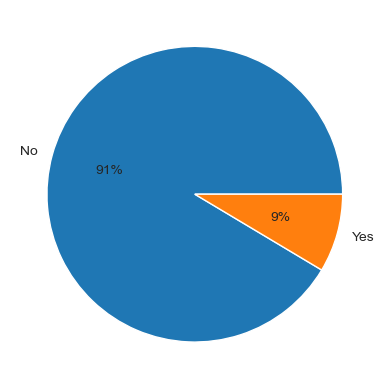

In [18]:
# Pie chart showing proportion of caffenated to decaf coffee
chart_numCoffeesPerMachineType(dataframe=df.groupby(by='Decaf Coffee?')['ID'].count())

The above pie chart indicates the proportion of coffee flavours that are caffeinatted and decaffeinated. That being said, there significantly less decaf coffee flavour options based on the chart.

array([[<AxesSubplot:xlabel='Acidity Classification', ylabel='count'>,
        <AxesSubplot:xlabel='Bitterness Classification', ylabel='count'>],
       [<AxesSubplot:xlabel='Body Classification', ylabel='count'>,
        <AxesSubplot:xlabel='Roastness Classification', ylabel='count'>]],
      dtype=object)

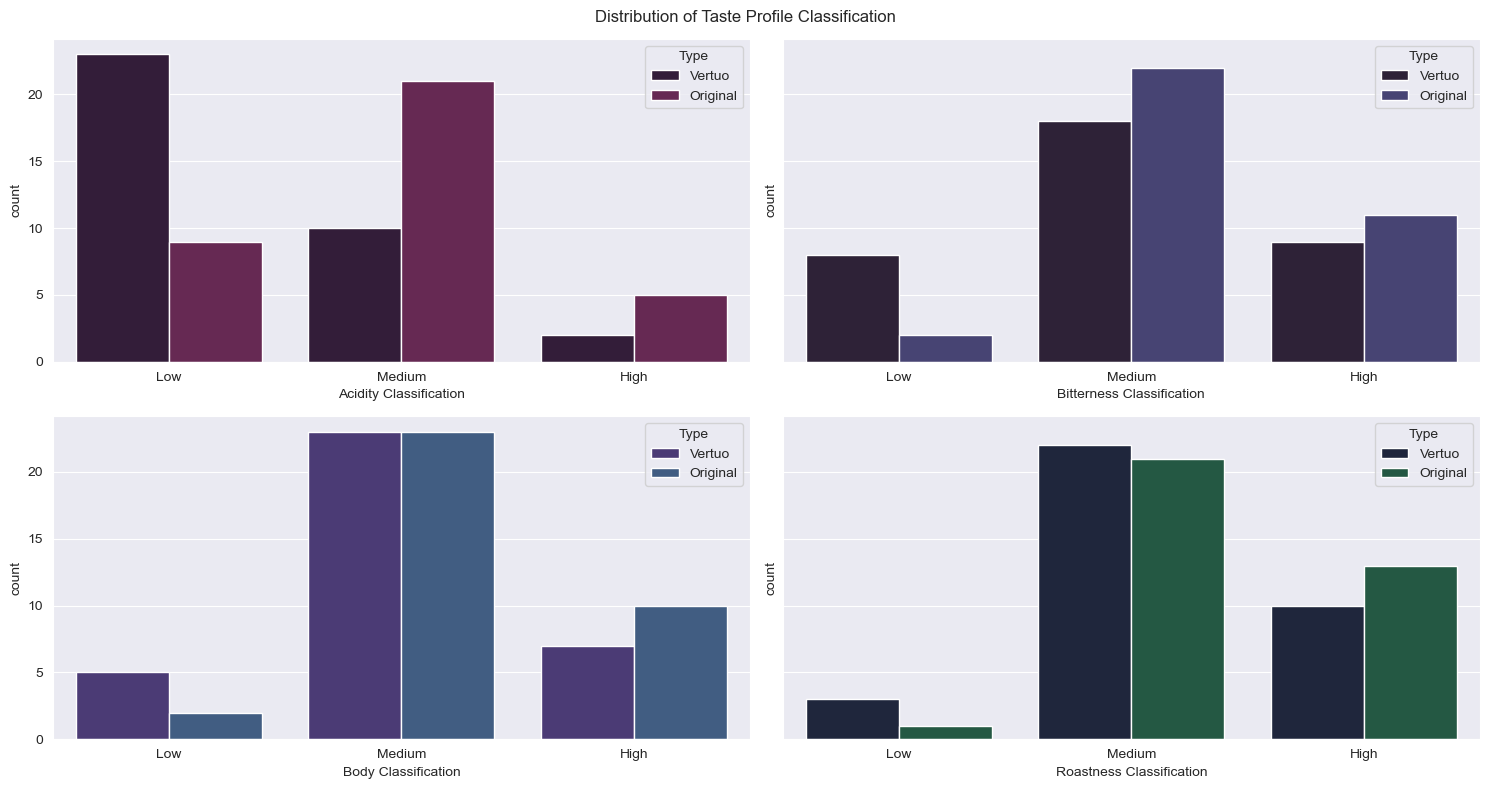

In [19]:
# Distribution of Taste profile classification by machine type
def charts_tasteProfileLevelsMachineType(dataframe, columns, title, palettes):
    fig, axes = plt.subplots(2, 2, figsize=(15,8), sharey='all');
    fig.suptitle(title);
    limit = len(dataframe[columns[0]].unique()) - 1;
    sns.countplot(ax=axes[0, 0], data=dataframe, x=columns[0], hue='Type', palette=palettes[0][0:limit], order=["Low", "Medium", "High"]);
    sns.countplot(ax=axes[0, 1], data=dataframe, x=columns[1], hue='Type', palette=palettes[1][0:limit], order=["Low", "Medium", "High"]);
    sns.countplot(ax=axes[1, 0], data=dataframe, x=columns[2], hue='Type', palette=palettes[2][0:limit], order=["Low", "Medium", "High"]);
    sns.countplot(ax=axes[1, 1], data=dataframe, x=columns[3], hue='Type', palette=palettes[3][0:limit], order=["Low", "Medium", "High"]);
    plt.tight_layout();
    return axes;

charts_tasteProfileLevelsMachineType(
    dataframe=df, 
    columns=['Acidity Classification','Bitterness Classification','Body Classification','Roastness Classification'], 
    title='Distribution of Taste Profile Classification',
    palettes=[
        sns.color_palette('rocket'),
        sns.color_palette("mako"),
        sns.color_palette('viridis'),
        sns.color_palette('cubehelix')
    ]
)

Most of the Taste Profile Classifications for both machine lines are of medium classification. The interesting observation regarding Acidity classification is that the Vertuo line machine has more coffee flavours with low acidity compared to Original line, whereas the Original line has more coffee flavours of medium & high acidity compared to Vertuo line.

array([[<AxesSubplot:xlabel='Milky Taste Classification', ylabel='count'>,
        <AxesSubplot:xlabel='Bitterness with Milk Classification', ylabel='count'>],
       [<AxesSubplot:xlabel='Roastiness with Milk Classification', ylabel='count'>,
        <AxesSubplot:xlabel='Creamy Texture Classification', ylabel='count'>]],
      dtype=object)

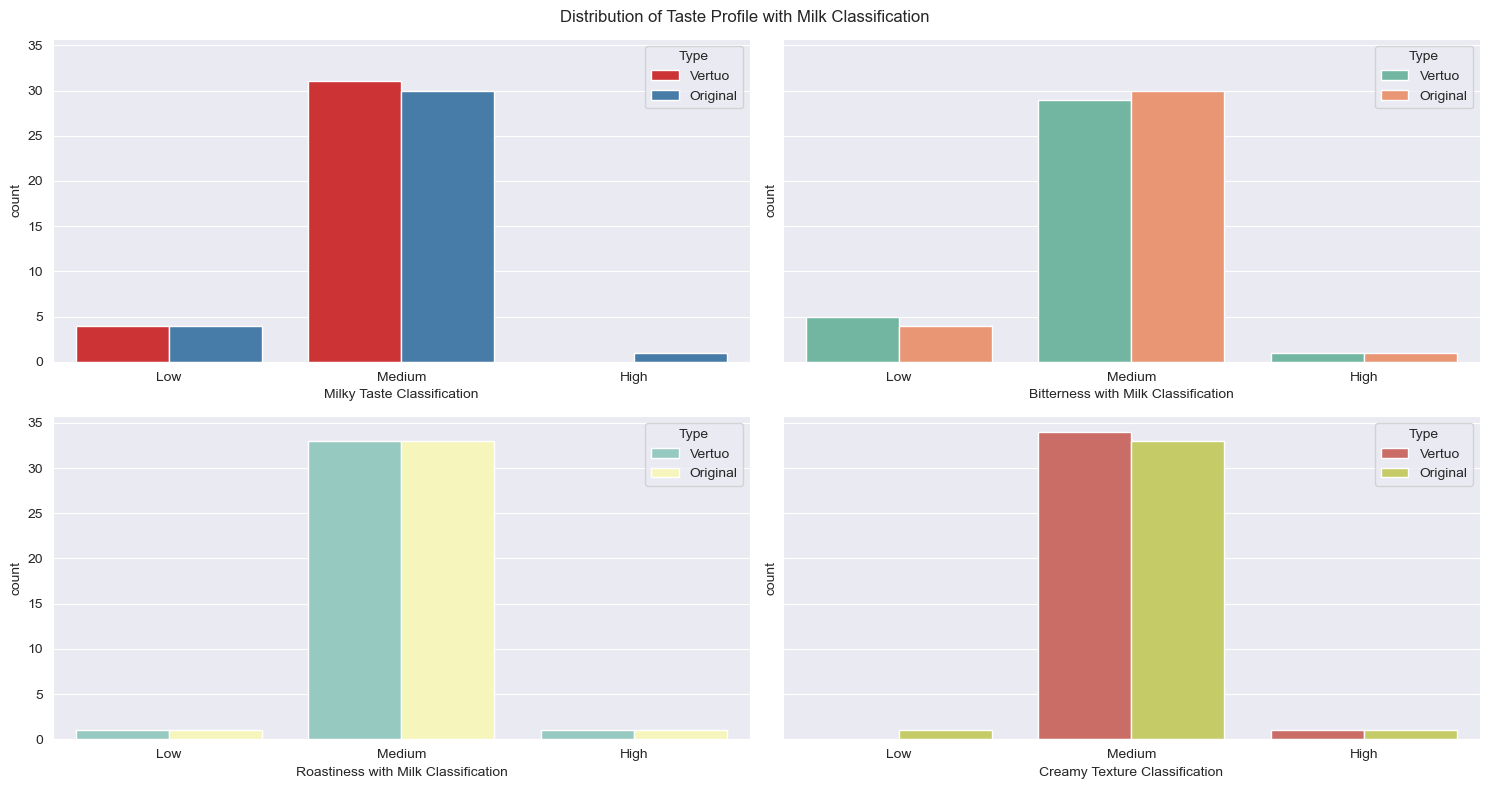

In [20]:
# Distribution of Taste profile with milk classification by machine type
# ['Milky Taste','Bitterness with Milk','Roastiness with Milk','Creamy Texture']
charts_tasteProfileLevelsMachineType(
    dataframe=df, 
    columns=['Milky Taste Classification','Bitterness with Milk Classification','Roastiness with Milk Classification','Creamy Texture Classification'], 
    title='Distribution of Taste Profile with Milk Classification',
    palettes=[
        sns.color_palette('Set1'),
        sns.color_palette("Set2"),
        sns.color_palette('Set3'),
        sns.color_palette('hls')
    ]
)

Based on the above charts, there does not seem to decipherable trend of distribution regarding the Taste Profile with Milk Classification. This is because there is only a small handful of coffee flavours that are flavoured. These are typically coffees in the Barista Creations category.

## Multivariate Analysis

In [21]:
# Correlation Dataframe regarding Taste Profile against Intensity
df[['Intensity','Acidity','Bitterness','Body','Roastness']].corr().style.background_gradient(cmap='Blues', axis=None)

,Intensity,Acidity,Bitterness,Body,Roastness
Intensity,1.000000,-0.382172,0.772945,0.576428,0.746133
Acidity,-0.382172,1.000000,-0.128497,-0.217389,-0.350865
Bitterness,0.772945,-0.128497,1.000000,0.646490,0.843639
Body,0.576428,-0.217389,0.646490,1.000000,0.639983
Roastness,0.746133,-0.350865,0.843639,0.639983,1.000000


<AxesSubplot:>

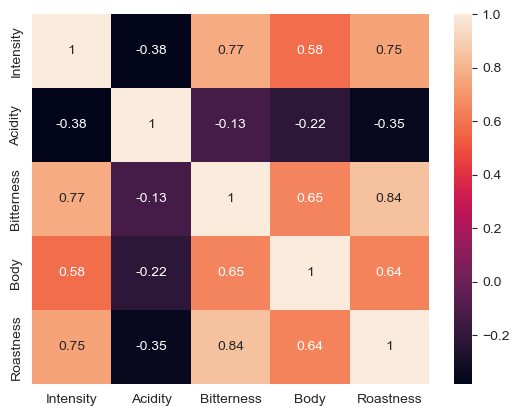

In [22]:
# Correlation heat map regarding Taste Profile against Intensity
def chart_correlationIntensityTasteProfile(dataframe, columns):
    chart = sns.heatmap(dataframe[columns].corr(), annot=True);
    return chart;

chart_correlationIntensityTasteProfile(dataframe=df, columns=['Intensity','Acidity','Bitterness','Body','Roastness'])

Based on the correlation heatmap above, intensity seems to have a relatively strong correlation with Bitterness & Roastiness compared to the other taste profile levels. Intensity is used as the definitive feature as it is the frequently used to assist customers on deciding which coffee flavours to purchase. 

In [23]:
# Correlation Dataframe regarding Taste Profile with Milk against Intensity
df[['Intensity','Milky Taste','Bitterness with Milk','Roastiness with Milk','Creamy Texture']].corr().style.background_gradient(cmap='Blues', axis=None)

,Intensity,Milky Taste,Bitterness with Milk,Roastiness with Milk,Creamy Texture
Intensity,1.000000,0.034568,0.222643,0.212937,-0.031781
Milky Taste,0.034568,1.000000,0.441808,0.118624,0.858458
Bitterness with Milk,0.222643,0.441808,1.000000,0.915616,0.347892
Roastiness with Milk,0.212937,0.118624,0.915616,1.000000,0.070411
Creamy Texture,-0.031781,0.858458,0.347892,0.070411,1.000000


<AxesSubplot:>

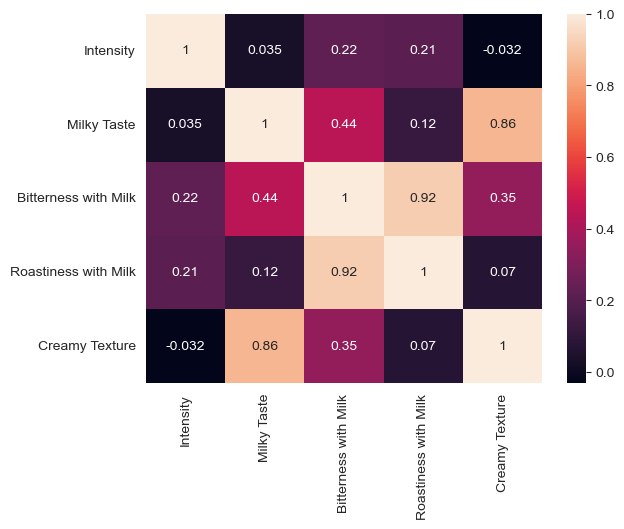

In [24]:
# Correlation heat map regarding Taste Profile with Milk against Intensity
chart_correlationIntensityTasteProfile(dataframe=df, columns=['Intensity','Milky Taste','Bitterness with Milk','Roastiness with Milk','Creamy Texture'])

The correlation heatmap above does not indicate as strong of a relationship between intensity and the other taste profile with milk levels.

array([[<AxesSubplot:xlabel='Acidity', ylabel='Intensity'>,
        <AxesSubplot:xlabel='Bitterness', ylabel='Intensity'>],
       [<AxesSubplot:xlabel='Body', ylabel='Intensity'>,
        <AxesSubplot:xlabel='Roastness', ylabel='Intensity'>]],
      dtype=object)

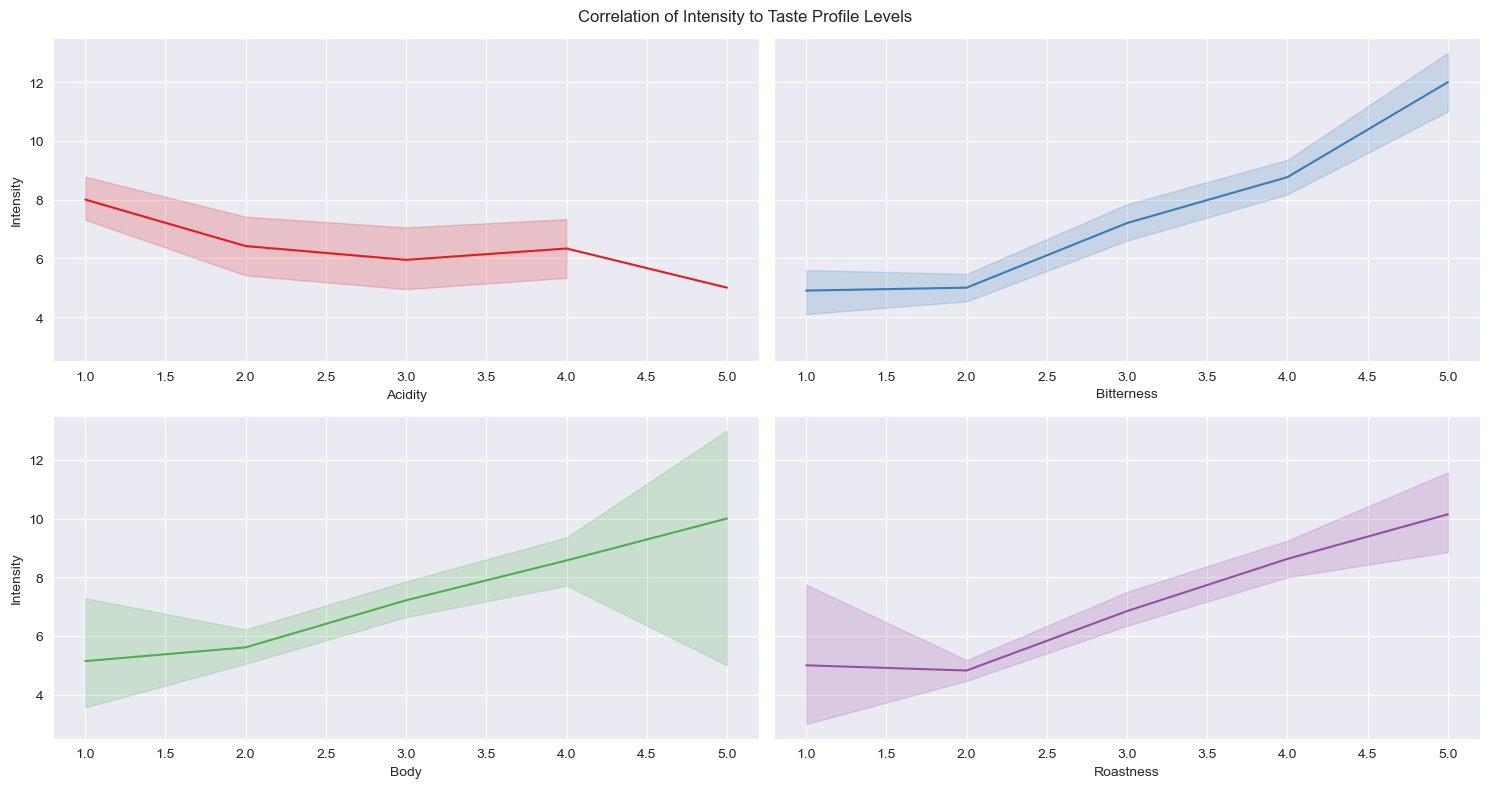

In [25]:
# Line plots to identify correlation of intensity to taste profile levels
def charts_intensityTasteProfileLevels(dataframe, columns, target, title, palette):
    fig, axes = plt.subplots(2, 2, figsize=(15,8), sharey='all');
    fig.suptitle(title);
    sns.lineplot(ax=axes[0, 0], data=dataframe, x=columns[0], y=target, color=palette[0]);
    sns.lineplot(ax=axes[0, 1], data=dataframe, x=columns[1], y=target, color=palette[1]);
    sns.lineplot(ax=axes[1, 0], data=dataframe, x=columns[2], y=target, color=palette[2]);
    sns.lineplot(ax=axes[1, 1], data=dataframe, x=columns[3], y=target, color=palette[3]);
    plt.tight_layout();
    return axes;

charts_intensityTasteProfileLevels(
    dataframe=df, 
    columns=['Acidity','Bitterness','Body','Roastness'], 
    target='Intensity',
    title="Correlation of Intensity to Taste Profile Levels",
    palette=sns.color_palette('Set1')
)

The general trend observed from the line charts above is that as Bitterness, Body, and Roastness are directly proportional to intensity, whereas Acidity are inversely proportional to Intensity.

array([[<AxesSubplot:xlabel='Milky Taste', ylabel='Intensity'>,
        <AxesSubplot:xlabel='Bitterness with Milk', ylabel='Intensity'>],
       [<AxesSubplot:xlabel='Roastiness with Milk', ylabel='Intensity'>,
        <AxesSubplot:xlabel='Creamy Texture', ylabel='Intensity'>]],
      dtype=object)

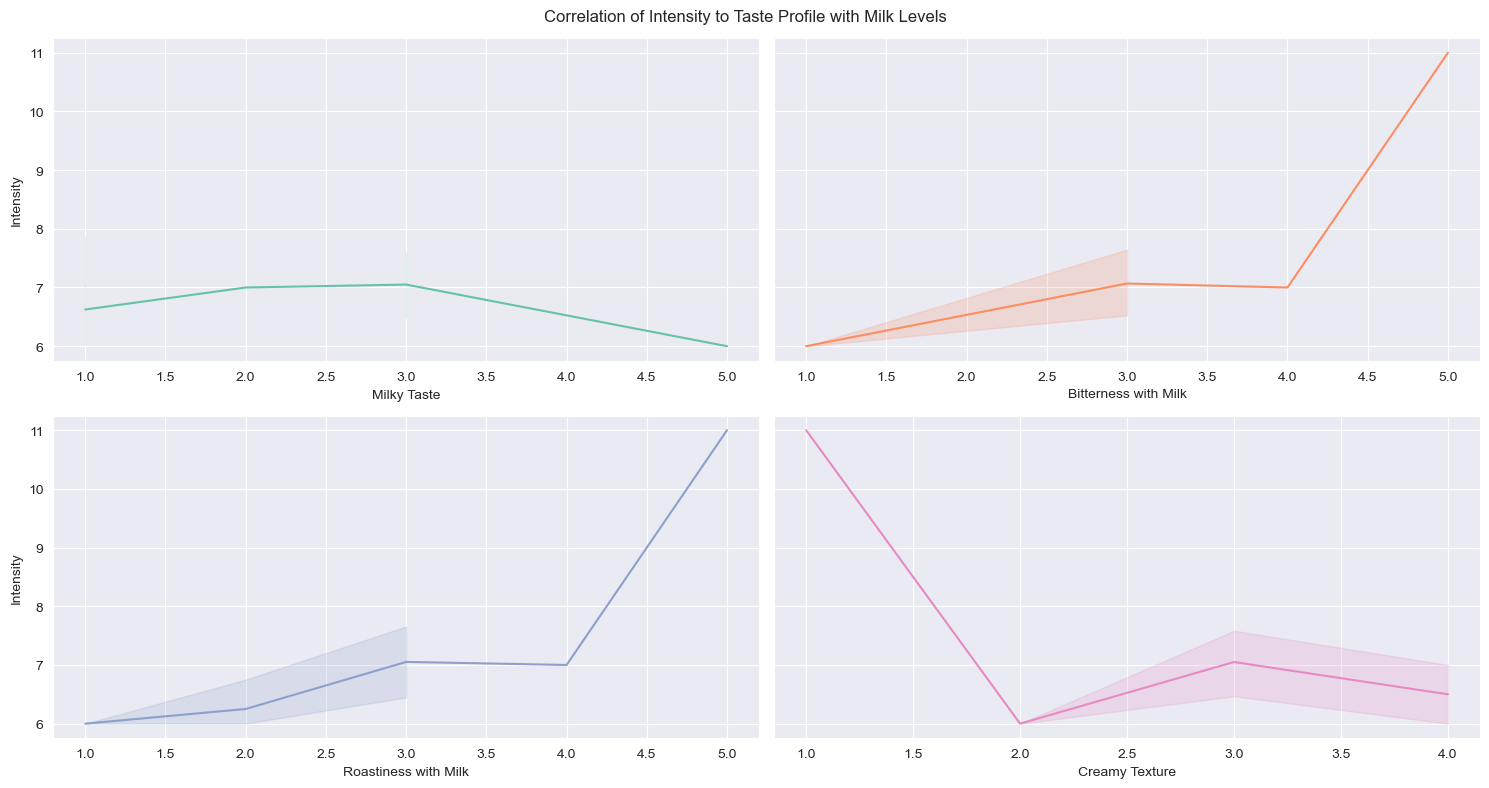

In [26]:
# Line plots to identify correlation of intensity to taste profile with milk levels
charts_intensityTasteProfileLevels(
    dataframe=df, 
    columns=['Milky Taste','Bitterness with Milk','Roastiness with Milk','Creamy Texture'], 
    target='Intensity',
    title="Correlation of Intensity to Taste Profile with Milk Levels",
    palette=sns.color_palette('Set2')
)

The general trend observed from the line charts above is that as Bitterness with Milk and Roastness with Milk are directly proportional to intensity, whereas Milky Taste and Creamy Texture are somewhat inversely proportional to Intensity.